In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import os
import image_masking as im
import importlib
import matplotlib.pyplot as plt
import pyspark

In [3]:
conf = pyspark.SparkConf().setMaster("local[2]").setAppName("loading").set('spark.jars', '../scifio-spark-datasource-uber.jar')
sc = pyspark.SparkContext(conf=conf)
spark = pyspark.sql.SparkSession(sc)

In [4]:
path = '../data/'
fileLimit = 2
channel = 1

In [6]:
df = im.load_dataframe(spark, path, fileLimit)
parameters = [{}, {}, {}, {}, {}, {}, {}]
mask = im.calculate_masks(df.take(10)[9])

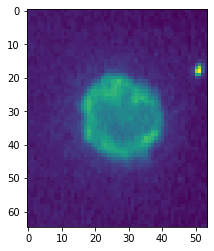

In [155]:
row = df.take(3)[1]
cell = im.row_to_image(row, channel)
plt.imshow(cell)

In [160]:
from image_masking import canny_masking

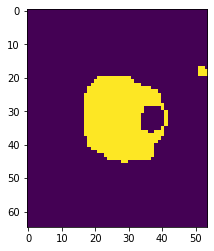

In [169]:
mask = canny_masking(cell, 11, 40, (6, 6))
plt.imshow(mask)

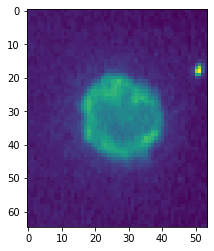

In [162]:
plt.imshow(cell)

## Parameter Search

In [37]:
cells = df.take(30)

<ipython-input-36-5815debbcc8d>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

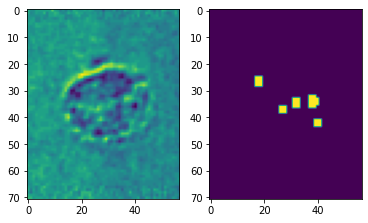

<Figure size 432x288 with 0 Axes>

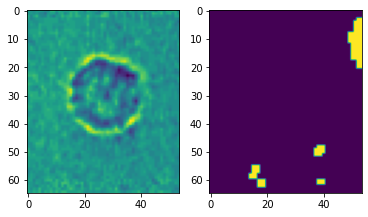

<Figure size 432x288 with 0 Axes>

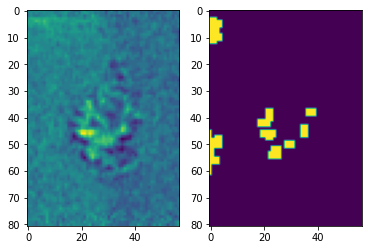

<Figure size 432x288 with 0 Axes>

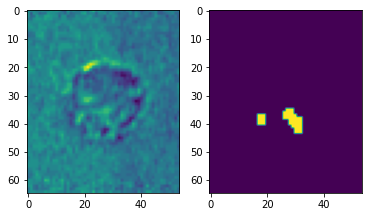

<Figure size 432x288 with 0 Axes>

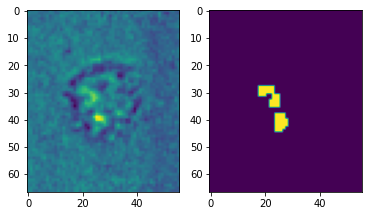

<Figure size 432x288 with 0 Axes>

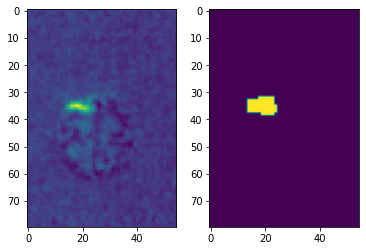

<Figure size 432x288 with 0 Axes>

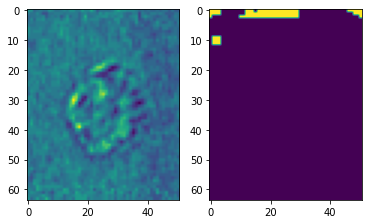

<Figure size 432x288 with 0 Axes>

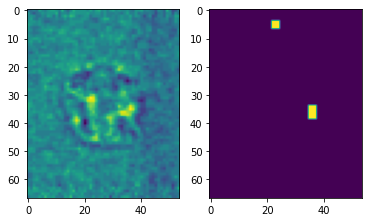

<Figure size 432x288 with 0 Axes>

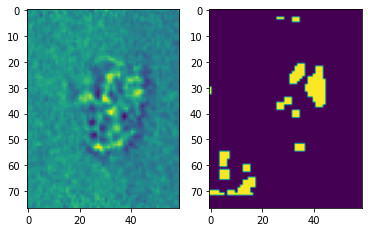

<Figure size 432x288 with 0 Axes>

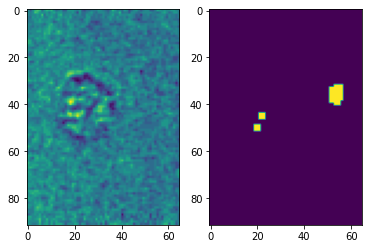

<Figure size 432x288 with 0 Axes>

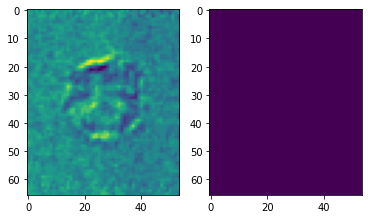

<Figure size 432x288 with 0 Axes>

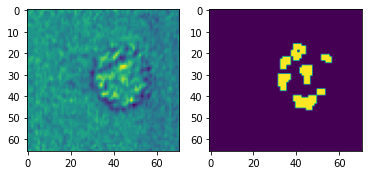

<Figure size 432x288 with 0 Axes>

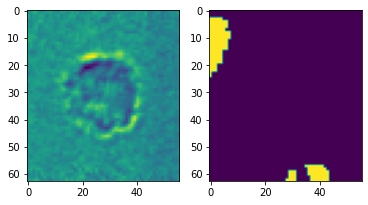

<Figure size 432x288 with 0 Axes>

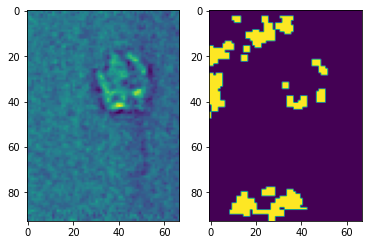

<Figure size 432x288 with 0 Axes>

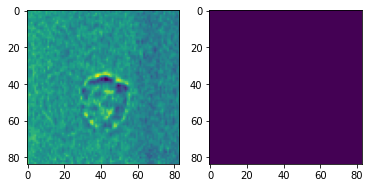

<Figure size 432x288 with 0 Axes>

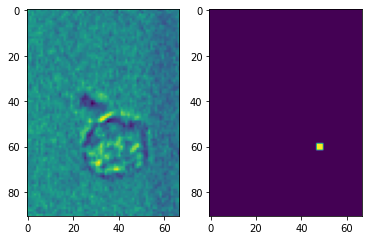

<Figure size 432x288 with 0 Axes>

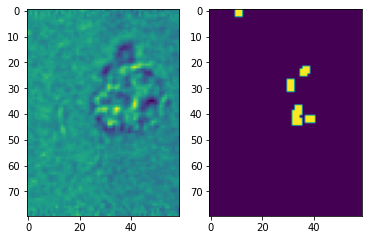

<Figure size 432x288 with 0 Axes>

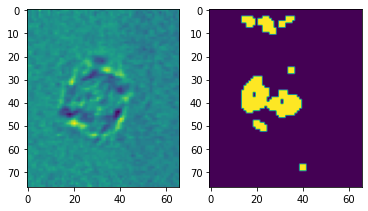

<Figure size 432x288 with 0 Axes>

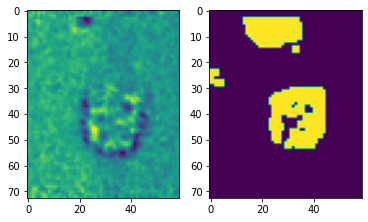

<Figure size 432x288 with 0 Axes>

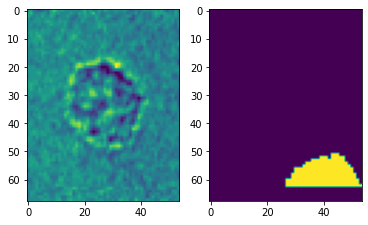

In [36]:
channel = 6
for cell in cells[:20]:
    image = im.row_to_image(cell, channel)
    mask = im.row_to_mask(cell, channel)

    plt.figure()
    _, axarr = plt.subplots(1, 2)
    axarr[0].imshow(image)
    axarr[1].imshow(mask)

In [40]:
import csv
with open('grid_search_results1.csv', 'w', newline='') as file:
    fields = ['channel', 'threshold1', 'threshold2', 'shape', 'training set balanced accuracy']
    writer = csv.DictWriter(file, fieldnames=fields)
    writer.writeheader()
    for channel in range(6):
        best_acc, best_params = im.parameter_search(cells, channel, range(10, 211, 10), range(10, 211, 10),                                                         [(6, 6), (7, 7), (8, 8), (9, 9), (10, 10)])
        print(f'Channel: {channel} processed')
        writer.writerow({fields[0]: channel,
                         fields[1]: best_params[0],
                         fields[2]: best_params[1], 
                         fields[3]: best_params[2], 
                         fields[4]: best_acc})


Channel: 0 processed
Channel: 1 processed
Channel: 2 processed
Channel: 3 processed
Channel: 4 processed
Channel: 5 processed
